In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Loading Data Set

In [2]:
fake= pd.read_csv("C:/Users/JYOTHISH/Downloads/Fake.csv/Fake.csv")
true = pd.read_csv("C:/Users/JYOTHISH/Downloads/True.csv/True.csv")

In [3]:
fake.shape

(23481, 4)

In [4]:
true.shape

(21417, 4)

# Data cleaning and preparation

In [5]:
fake['target'] = 'fake'
true['target'] = 'true'

In [6]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [7]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [8]:
# Concatenate Data Frames
data = pd.concat([fake,true]).reset_index(drop=True)
data.shape

(44898, 5)

In [9]:
data.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [10]:
# Shuffle the Data 

from sklearn.utils import shuffle
data = shuffle(data).reset_index(drop = True)

In [11]:
# Checking the Shuffled Data

data.head()

,title,text,subject,date,target
0,"Fired from 'Apprentice,' Omarosa may get Trump...","WASHINGTON (Reuters) - Omarosa Manigault, best...",politicsNews,"January 4, 2017",true
1,HE’S COMING BACK: Obama Returning To DC To Le...,"According to a family friend, Barack Obama has...",News,"March 2, 2017",fake
2,WHOA! DNC DISASTER: Sanders Supporters CRASH W...,The DNC Convention got off to a crazy start! D...,politics,"Jul 25, 2016",fake
3,South Africa's unruly ANC branches kick off ra...,JOHANNESBURG (Reuters) - South Africa s ruling...,worldnews,"November 1, 2017",true
4,If Your Biological Plumbing Doesn’t Match Sign...,PC is killing our country. This is called figh...,politics,"Jan 2, 2016",fake


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [13]:
# Removing the Date

data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,"Fired from 'Apprentice,' Omarosa may get Trump...","WASHINGTON (Reuters) - Omarosa Manigault, best...",politicsNews,true
1,HE’S COMING BACK: Obama Returning To DC To Le...,"According to a family friend, Barack Obama has...",News,fake
2,WHOA! DNC DISASTER: Sanders Supporters CRASH W...,The DNC Convention got off to a crazy start! D...,politics,fake
3,South Africa's unruly ANC branches kick off ra...,JOHANNESBURG (Reuters) - South Africa s ruling...,worldnews,true
4,If Your Biological Plumbing Doesn’t Match Sign...,PC is killing our country. This is called figh...,politics,fake


In [14]:
# Removing the title 

data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,"WASHINGTON (Reuters) - Omarosa Manigault, best...",politicsNews,true
1,"According to a family friend, Barack Obama has...",News,fake
2,The DNC Convention got off to a crazy start! D...,politics,fake
3,JOHANNESBURG (Reuters) - South Africa s ruling...,worldnews,true
4,PC is killing our country. This is called figh...,politics,fake


In [15]:
# Converting into LowerCase

data['text'] = data['text'].apply(lambda x : x.lower())
data.head()

,text,subject,target
0,"washington (reuters) - omarosa manigault, best...",politicsNews,true
1,"according to a family friend, barack obama has...",News,fake
2,the dnc convention got off to a crazy start! d...,politics,fake
3,johannesburg (reuters) - south africa s ruling...,worldnews,true
4,pc is killing our country. this is called figh...,politics,fake


In [16]:
# Remove the Punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [17]:
# Checking

data.head()

,text,subject,target
0,washington reuters omarosa manigault bestknow...,politicsNews,true
1,according to a family friend barack obama has ...,News,fake
2,the dnc convention got off to a crazy start de...,politics,fake
3,johannesburg reuters south africa s ruling af...,worldnews,true
4,pc is killing our country this is called fight...,politics,fake


In [18]:
# Removing StopWords

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JYOTHISH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
data.head()

,text,subject,target
0,washington reuters omarosa manigault bestknown...,politicsNews,true
1,according family friend barack obama plans dc ...,News,fake
2,dnc convention got crazy start debbie wasserma...,politics,fake
3,johannesburg reuters south africa ruling afric...,worldnews,true
4,pc killing country called fighting back counte...,politics,fake


# Basic Data Exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


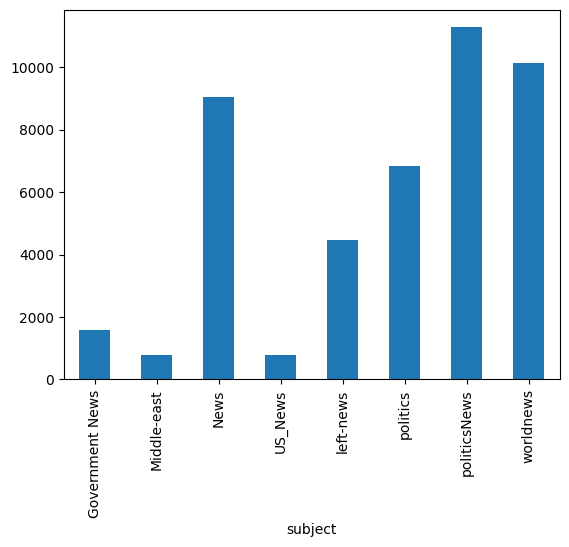

In [20]:
# How many articles per subject?

print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


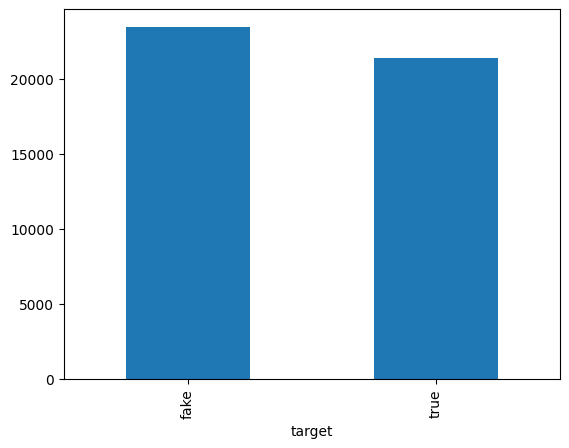

In [21]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [22]:
 !pip install wordcloud

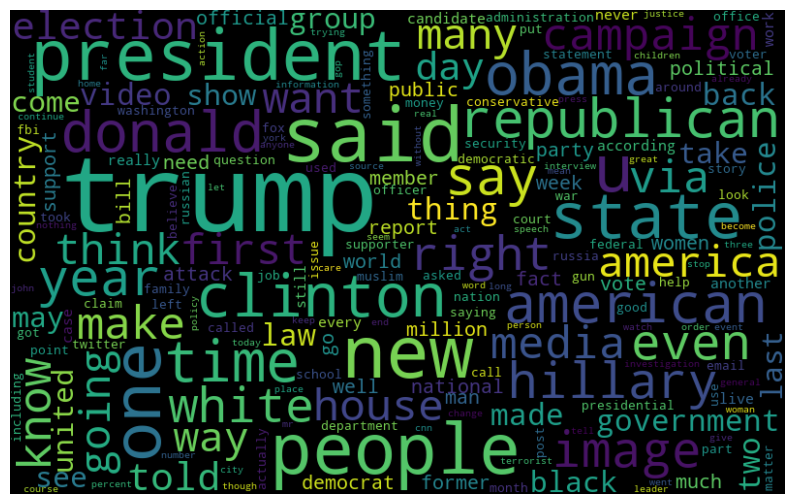

In [23]:
# Word cloud for fake news

from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

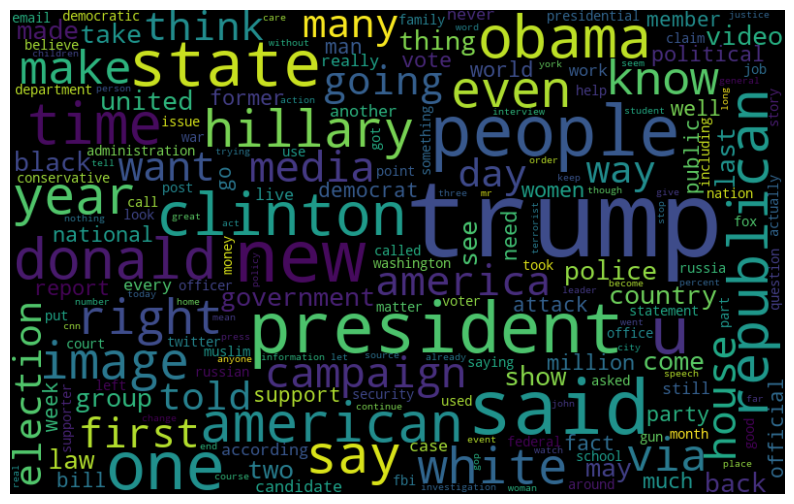

In [24]:
# Word cloud for real news

from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
# Most frequent words counter   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

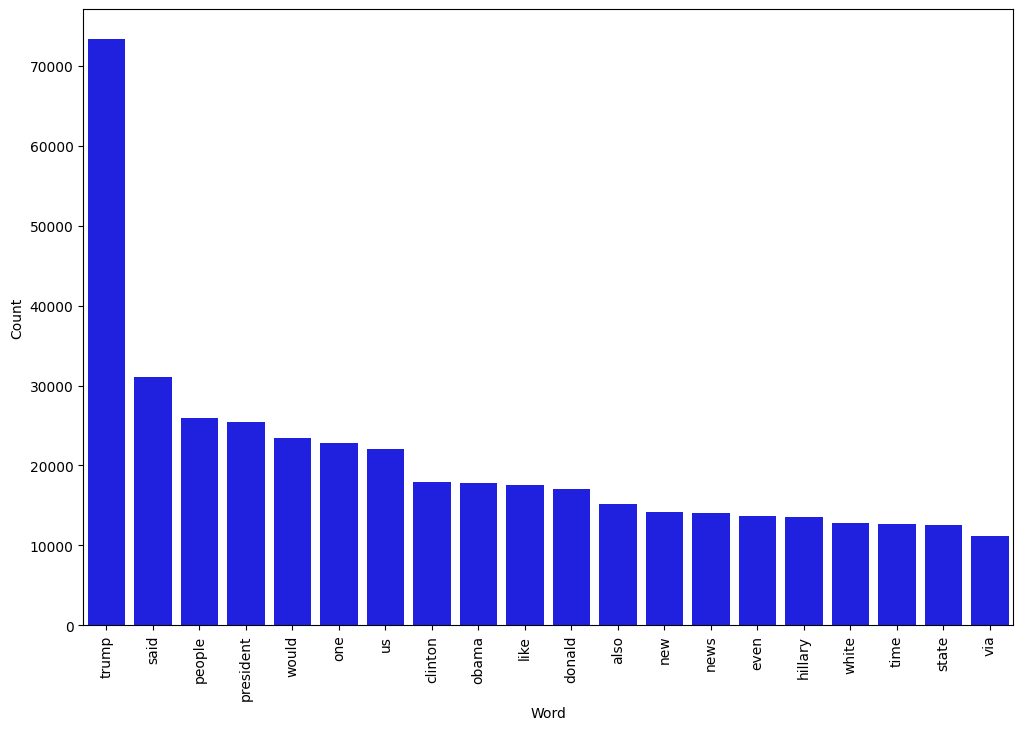

In [26]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

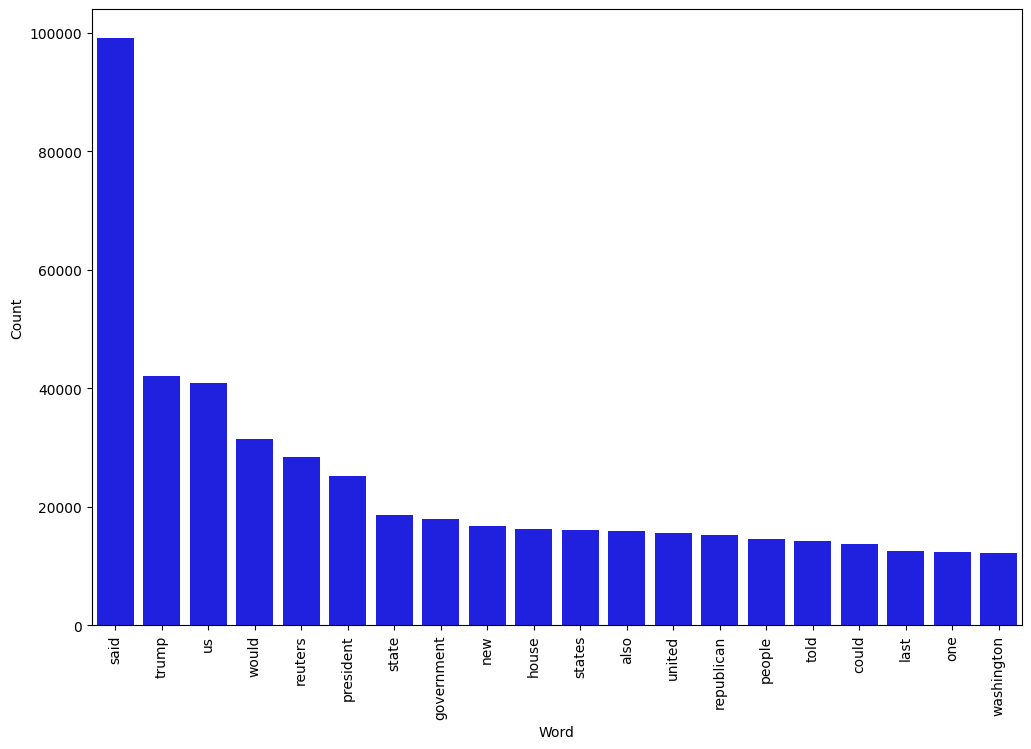

In [27]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

# Modeling

In [28]:
# Function to plot the confusion matrix

from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Split Data

In [29]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)


In [30]:
X_train.head()

36335    new york reuters federal appeals court fired s...
12384    moscow reuters russian nuclearcapable strategi...
24419    moscow reuters russia warned wednesday new us ...
24740    ankara reuters iran turkey work together confr...
27039    washington reuters heated moment unconventiona...
Name: text, dtype: object

In [31]:
y_train.head()

36335    true
12384    true
24419    true
24740    true
27039    true
Name: target, dtype: object

# Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier


# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=20,
                                                    splitter='best',
                                                    random_state=42))])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: {}%".format(round(accuracy * 100, 2)))

# Precision
precision = precision_score(y_test, prediction, average='weighted')
print("Precision: {}%".format(round(precision * 100, 2)))

# Recall
recall = recall_score(y_test, prediction, average='weighted')
print("Recall: {}%".format(round(recall * 100, 2)))

# F1 Score
f1 = f1_score(y_test, prediction, average='weighted')
print("F1 Score: {}%".format(round(f1 * 100, 2)))

Accuracy: 99.64%
Precision: 99.64%
Recall: 99.64%
F1 Score: 99.64%


# Confusion Matrix

Confusion matrix, without normalization


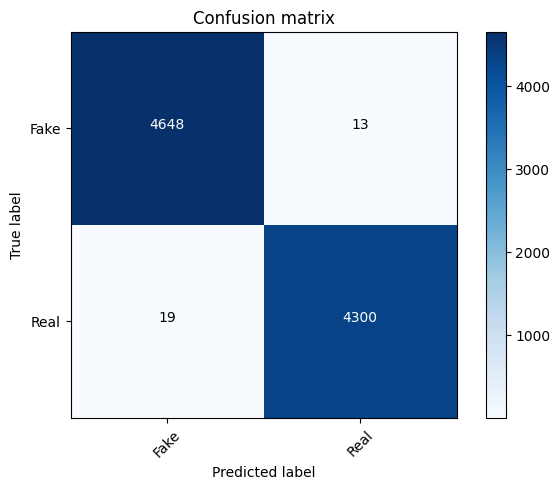

In [33]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])